# <font color='blue'>Preventing Customer Churn Telecommunications Companies </font>


In [1]:
#Importing main packages to start exploratory analysis
import pandas as pd
import numpy as np
from pandas import read_csv
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
archive = 'projeto4_telecom_treino.csv'
data = read_csv(archive)
df=data.drop('Unnamed: 0', axis=1)
# Add Count
df["counter"]=1
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,1
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,1
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,1
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,1
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,no,1
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,no,1
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,no,1
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,no,1


# Exploratory data analysis

In [3]:
# Checking datatypes
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
counter                            int64
dtype: object

In [4]:
# further on we must balance the dataset
df.groupby("churn").size()

churn
no     2850
yes     483
dtype: int64

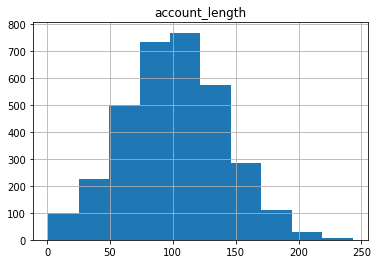

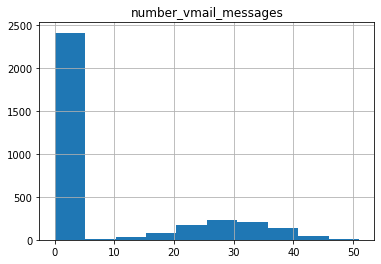

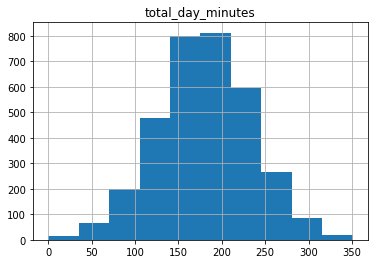

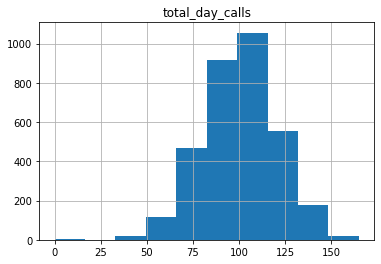

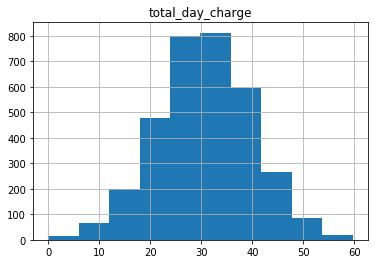

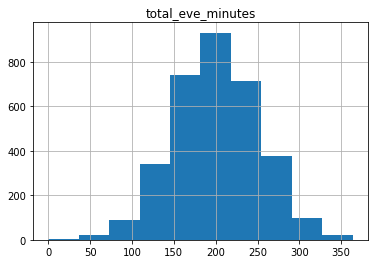

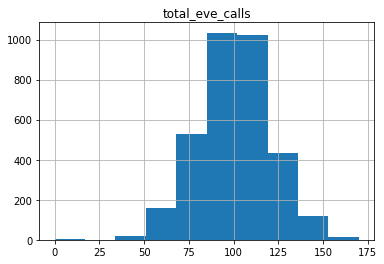

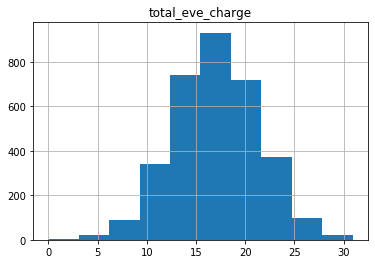

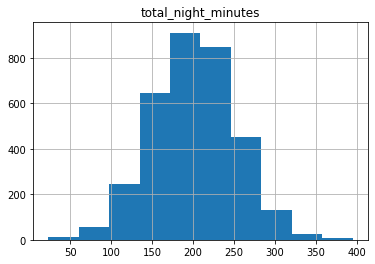

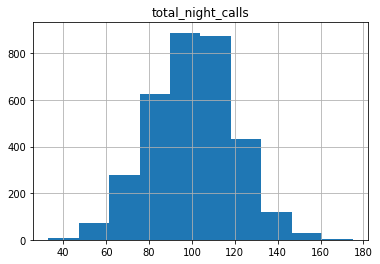

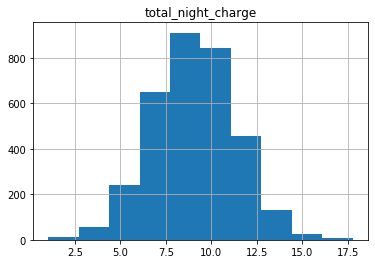

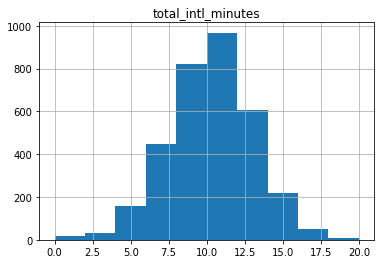

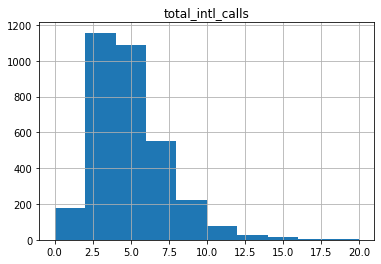

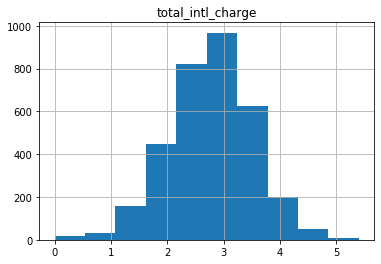

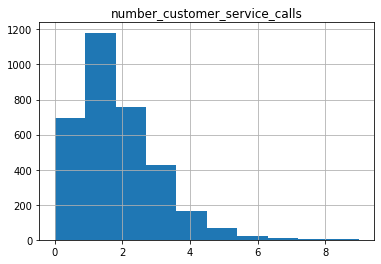

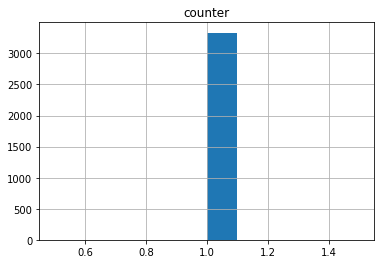

In [5]:
for features in df.columns:
    if df[features].dtypes!='object':
        df.hist(features)

In [6]:
Calls_Churn=df.groupby(["number_customer_service_calls","churn"]).agg({"churn":["count"]}).reset_index()
Calls_Churn.columns=["Ligacoes","churn","volume"]
Calls_Churn_grp=Calls_Churn.pivot(index="Ligacoes",columns='churn',values='volume')
Calls_Churn_grp["Total"]=Calls_Churn_grp["yes"]+Calls_Churn_grp["no"]
Calls_Churn_grp["Churn_perc"]=round(Calls_Churn_grp["yes"]/Calls_Churn_grp["Total"]*100,2)
Calls_Churn_grp

churn,no,yes,Total,Churn_perc
Ligacoes,,,,
0,605.0,92.0,697.0,13.20
1,1059.0,122.0,1181.0,10.33
2,672.0,87.0,759.0,11.46
3,385.0,44.0,429.0,10.26
4,90.0,76.0,166.0,45.78
5,26.0,40.0,66.0,60.61
6,8.0,14.0,22.0,63.64
7,4.0,5.0,9.0,55.56
8,1.0,1.0,2.0,50.00


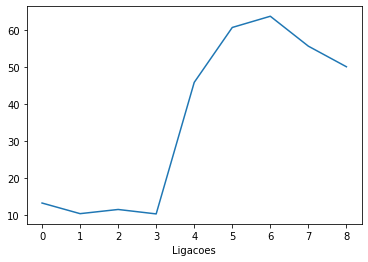

In [7]:
# As we can below from 4 calls on more than half cancel their plans. Therefore lets create a feature called "CS_Calls_Range" wihch takes ""<4" or "">=4"
Calls_Churn_grp["Churn_perc"].plot(kind='line')

In [8]:
df["CS_Calls_Range"]=np.where(df["number_customer_service_calls"]<4,"0-3","4-7")

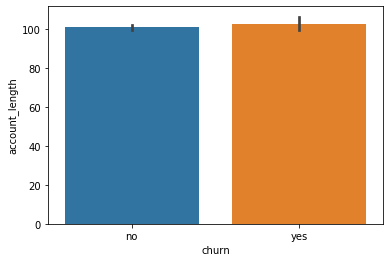

In [9]:
# At first there is no correlation between account_length and churns
sns.barplot(x = "churn", y = "account_length", data = df);

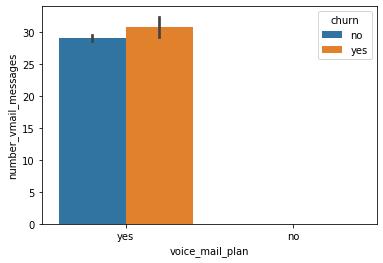

In [10]:
# barplot
sns.barplot(x = "voice_mail_plan", y = "number_vmail_messages", hue = "churn", data = df);

In [11]:
df["total_day_min_per_call"]=df["total_day_minutes"]/df["total_day_calls"]
df["total_eve_min_per_call"]=df["total_eve_minutes"]/df["total_eve_calls"]
df["total_night_min_per_call"]=df["total_night_minutes"]/df["total_night_calls"]
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter,CS_Calls_Range,total_day_min_per_call,total_eve_min_per_call,total_night_min_per_call
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,10.0,3,2.70,1,no,1,0-3,2.410000,1.993939,2.689011
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,13.7,3,3.70,1,no,1,0-3,1.313821,1.898058,2.469903
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,no,1,0-3,2.135088,1.101818,1.563462
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,6.6,7,1.78,2,no,1,0-3,4.216901,0.703409,2.212360
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,no,1,0-3,1.475221,1.215574,1.544628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,...,9.9,6,2.67,2,no,1,0-3,2.028571,1.710317,3.362651
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,...,9.6,4,2.59,3,no,1,0-3,4.054386,2.789091,1.555285
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,...,14.1,6,3.81,2,no,1,0-3,1.658716,4.979310,2.108791
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,...,5.0,10,1.35,2,no,1,0-3,2.036190,1.900000,1.016058


In [12]:
df["highest_period_minutes"]=df[["total_day_min_per_call","total_eve_min_per_call","total_night_min_per_call"]].idxmax(axis=1)
df[["highest_period_minutes"]]=df[["highest_period_minutes"]].replace(["total_day_min_per_call","total_eve_min_per_call","total_night_min_per_call"], ["day","eve","night"])
df


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,counter,CS_Calls_Range,total_day_min_per_call,total_eve_min_per_call,total_night_min_per_call,highest_period_minutes
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,3,2.70,1,no,1,0-3,2.410000,1.993939,2.689011,night
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,3,3.70,1,no,1,0-3,1.313821,1.898058,2.469903,night
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,5,3.29,0,no,1,0-3,2.135088,1.101818,1.563462,day
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,7,1.78,2,no,1,0-3,4.216901,0.703409,2.212360,day
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,3,2.73,3,no,1,0-3,1.475221,1.215574,1.544628,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,...,6,2.67,2,no,1,0-3,2.028571,1.710317,3.362651,night
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,...,4,2.59,3,no,1,0-3,4.054386,2.789091,1.555285,day
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,...,6,3.81,2,no,1,0-3,1.658716,4.979310,2.108791,eve
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,...,10,1.35,2,no,1,0-3,2.036190,1.900000,1.016058,day


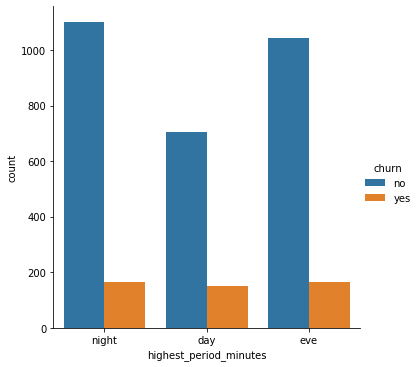

In [13]:
# barplot
sns.catplot(x = "highest_period_minutes", kind="count", hue = "churn", data = df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F685CB2F48>]],
      dtype=object)

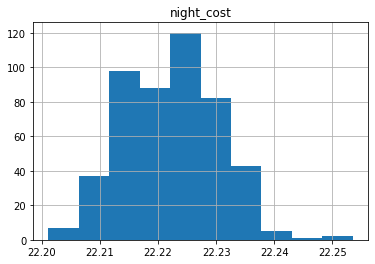

In [14]:
churn=df[df["churn"]=="yes"][["total_day_minutes","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_charge"]]
churn["night_cost"]=churn["total_night_minutes"]/churn["total_night_charge"]
churn.hist("night_cost")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F685CBDB08>]],
      dtype=object)

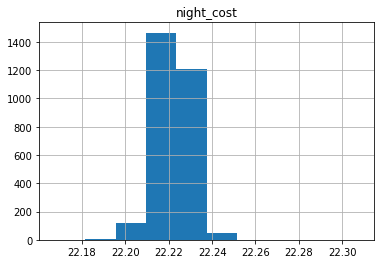

In [15]:
churn=df[df["churn"]=="no"][["total_day_minutes","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_charge"]]
churn["night_cost"]=churn["total_night_minutes"]/churn["total_night_charge"]
churn.hist("night_cost")

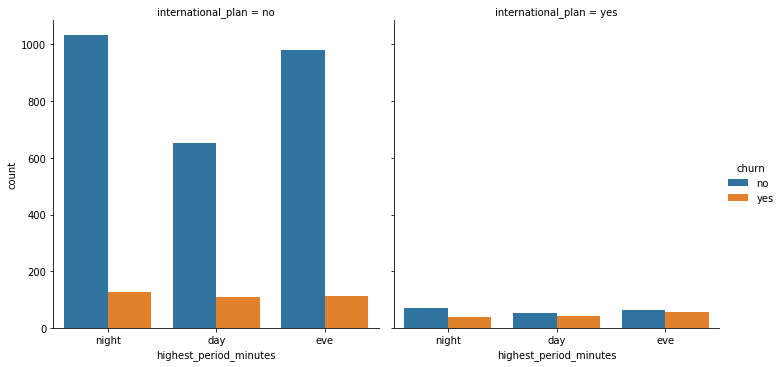

In [16]:
# barplot
sns.catplot(x = "highest_period_minutes", kind="count", hue = "churn", col="international_plan", data = df);

In [17]:
df[df["international_plan"]=="yes"].pivot_table(values="counter",index="CS_Calls_Range",columns=["churn"],aggfunc="sum",fill_value=0)

churn,no,yes
CS_Calls_Range,,
0-3,177,118
4-7,9,19


In [18]:
df.pivot_table(values="counter",index="CS_Calls_Range",columns=["international_plan","churn"],aggfunc="sum",fill_value=0)

international_plan    no       yes     
churn                 no  yes   no  yes
CS_Calls_Range                         
0-3                 2544  227  177  118
4-7                  120  119    9   19

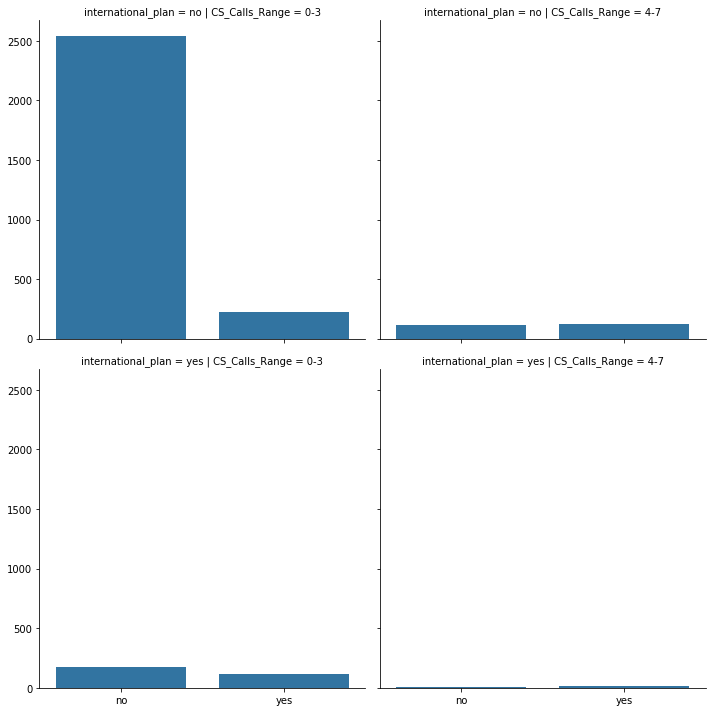

In [19]:
# Customers who have internacional plan used to cancel more than those haven't
g = sns.FacetGrid(df, col="CS_Calls_Range",  row="international_plan",size=5)
g.map_dataframe(sns.countplot, x="churn")

In [20]:
churn_state=df.pivot_table(values="counter",index="state",columns="churn", aggfunc='sum').reset_index()
churn_state["total"]=churn_state["yes"]+churn_state["no"]
churn_state["yes_perc"]=round(churn_state["yes"]/churn_state["total"]*100,1)
churn_state=churn_state.sort_values(by=["yes_perc"], ascending=False)
churn_state.head(10)

churn,state,no,yes,total,yes_perc
31,NJ,50,18,68,26.5
4,CA,25,9,34,26.5
43,TX,54,18,72,25.0
20,MD,53,17,70,24.3
40,SC,46,14,60,23.3
22,MI,57,16,73,21.9
25,MS,51,14,65,21.5
33,NV,52,14,66,21.2
47,WA,52,14,66,21.2
21,ME,49,13,62,21.0


In [21]:
churn_state.dtypes

churn
state        object
no            int64
yes           int64
total         int64
yes_perc    float64
dtype: object

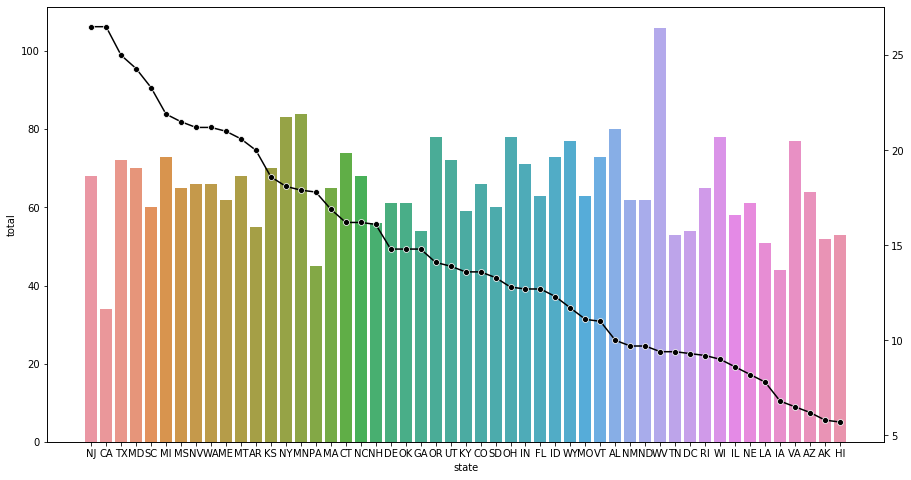

In [22]:
fig, ax1 = plt.subplots(figsize=(15,8))

sns.barplot(x="state", y="total", data=churn_state, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = churn_state['yes_perc'].values, marker='o', ax=ax2, color="black")

In [23]:
def faixa(valor):
    if valor <= 5.0:
        return '0-5'
    elif valor<=10.0:
        return '5-10'
    elif valor<=15.0:
        return '10-15'
    elif valor<=20.0:
        return '15-20'
    elif valor<=25.0:
        return '20-25'
    elif valor<=100:
        return '>25'
    else:
        return '0-5'

In [24]:
churn_state["range_churn"]=churn_state['yes_perc'].apply(faixa)

In [25]:
df=df.merge(churn_state[["state","range_churn"]], on = 'state')

# Feature Selection

In [26]:
#State
#Internacional Plan
#number_customer_service_calls
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'counter', 'CS_Calls_Range',
       'total_day_min_per_call', 'total_eve_min_per_call',
       'total_night_min_per_call', 'highest_period_minutes', 'range_churn'],
      dtype='object')

In [27]:
df_FS=df[['range_churn', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','CS_Calls_Range',
       'highest_period_minutes','churn']]

# Dataset Transformation

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
df_FS.dtypes[df_FS.dtypes=='object']

range_churn               object
area_code                 object
international_plan        object
voice_mail_plan           object
CS_Calls_Range            object
highest_period_minutes    object
churn                     object
dtype: object

Columns 'international_plan', 'voice_mail_plan', 'CS_Calls_Range', 'churn' are of binary type, i.e, having 'yes' or 'no' as values. They will be converted to 1 and 0 respectively.

In [30]:
df_FS[['international_plan']]=df_FS[['international_plan']].replace(['yes','no'], [1,0])
df_FS[['voice_mail_plan']]=df_FS[['voice_mail_plan']].replace(['yes','no'], [1,0])
df_FS[['churn']]=df_FS[['churn']].replace(['yes','no'], [1,0])

Column 'CS_Calls_Range' has '0-3' or '4-7' as values. They will be converted to 1 and 0 respectively.

In [31]:
df_FS[['CS_Calls_Range']]=df_FS[['CS_Calls_Range']].replace(['0-3','4-7'], [1,0])

Column 'area_code' and 'highest_period_minutes' has three possible values. Let's break each feature into 3 binary column.

    area_code

In [32]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['area_code_510','area_code_408','area_code_415']])
enc_cols = enc.fit_transform(df_FS[['area_code']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['area_code_510','area_code_408','area_code_415'])
enc_df
df_FS = df_FS.join(enc_df)

    highest_period_minutes

In [33]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['night','day','eve']])
enc_cols = enc.fit_transform(df_FS[['highest_period_minutes']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['night','day','eve'])
enc_df
df_FS = df_FS.join(enc_df)

For 'state' feature there are six possible values. The same reasoning from previous cases was used.  

In [34]:
enc = OneHotEncoder(handle_unknown='ignore', categories=[['0-5','5-10','10-15','15-20','20-25','>25']])
enc_cols = enc.fit_transform(df_FS[['range_churn']]).toarray().astype('int')
enc_df = pd.DataFrame(enc_cols, columns = ['0-5','5-10','10-15','15-20','20-25','>25'])
enc_df
df_FS = df_FS.join(enc_df)

For n possible values in a feature we need just n-1 columns to identify all of them. Let's drop one of binares columns native from each feature. 

In [35]:
df_FS.columns

Index(['range_churn', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'CS_Calls_Range',
       'highest_period_minutes', 'churn', 'area_code_510', 'area_code_408',
       'area_code_415', 'night', 'day', 'eve', '0-5', '5-10', '10-15', '15-20',
       '20-25', '>25'],
      dtype='object')

In [36]:
df_T = df_FS.drop(['area_code','area_code_510','range_churn','0-5','highest_period_minutes','night',], 1)

In [37]:
df_T.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'CS_Calls_Range', 'churn', 'area_code_408',
       'area_code_415', 'day', 'eve', '5-10', '10-15', '15-20', '20-25',
       '>25'],
      dtype='object')

# Balancing Dataset

In [38]:
# class count
class_count_0, class_count_1 = df_T['churn'].value_counts()

# Separate class
class_0 = df_T[df_T['churn'] == 0]
class_1 = df_T[df_T['churn'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2850, 27)
class 1: (483, 27)


In [39]:
class_1_over = class_1.sample(class_count_0, replace=True)
df_balanced = pd.concat([class_1_over, class_0], axis=0)
class_count_0_new, class_count_1_new = df_T['churn'].value_counts()
print(class_count_0_new, class_count_1_new)

2850 483


In [40]:
df_balanced.groupby("churn").size()

churn
0    2850
1    2850
dtype: int64

In [41]:
df_balanced

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,churn,area_code_408,area_code_415,day,eve,5-10,10-15,15-20,20-25,>25
2762,107,0,0,0,222.3,101,37.79,286.0,111,24.31,...,1,0,1,0,1,1,0,0,0,0
1960,76,1,0,0,273.3,66,46.46,263.6,121,22.41,...,1,0,1,1,0,0,0,0,1,0
2752,119,1,1,15,160.0,95,27.20,209.5,110,17.81,...,1,0,1,0,1,1,0,0,0,0
2602,133,1,1,32,221.1,137,37.59,264.9,99,22.52,...,1,1,0,0,1,0,0,1,0,0
392,119,1,1,16,147.2,103,25.02,160.1,96,13.61,...,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,84,0,1,38,193.0,106,32.81,153.6,106,13.06,...,0,1,0,0,0,1,0,0,0,0
3329,131,0,1,33,177.1,100,30.11,194.0,85,16.49,...,0,1,0,0,1,1,0,0,0,0
3330,75,0,1,24,225.5,119,38.34,182.0,108,15.47,...,0,1,0,0,0,1,0,0,0,0
3331,27,0,0,0,227.4,67,38.66,248.0,115,21.08,...,0,0,1,1,0,1,0,0,0,0


# Training and Test Data

In [42]:
# Import modules
from sklearn.model_selection import train_test_split

# Training size
teste_size = 0.33

# Loading data
array = df_balanced.values

# Seprating in input and output components
X = array[:,0:21]
Y = df_balanced.iloc[:,21]


# Creating training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = teste_size)

In [43]:
#pip install --upgrade scikit-learn

# Import modules

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

result_scores=[]

In [44]:
def evauation_model(pred, y_val):
    score_MSE = round(mean_squared_error(pred, y_val),2)
    score_MAE = round(mean_absolute_error(pred, y_val),2)
    score_r2score = round(r2_score(pred, y_val),2)
    return score_MSE, score_MAE, score_r2score


In [45]:
# Logistic Regression
model = LogisticRegression()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
# Forecast
forecast_LR=forecast
reportLR = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Logistic Regrassion',
                      round(score_MSE, 2),
                      round(score_MAE, 2),
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                     ))

print(reportLR)
print(result_scores)
#print(forecast)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1202
           1       0.94      0.95      0.95       679

    accuracy                           0.96      1881
   macro avg       0.96      0.96      0.96      1881
weighted avg       0.96      0.96      0.96      1881

[('Logistic Regrassion', 0.04, 0.04, 0.83, 0.96)]


In [46]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
# Forecast
forecast_GBC=forecast
reportGBC = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Gradient Boosting Classifier', round(score_MSE, 2), 
                      round(score_MAE, 2), 
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                      ))

print(reportGBC)
print(result_scores)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1202
           1       0.97      0.98      0.98       679

    accuracy                           0.98      1881
   macro avg       0.98      0.98      0.98      1881
weighted avg       0.98      0.98      0.98      1881

[('Logistic Regrassion', 0.04, 0.04, 0.83, 0.96), ('Gradient Boosting Classifier', 0.02, 0.02, 0.92, 0.98)]


In [47]:
# Random Forest Regressor
model = RandomForestRegressor()

# Training model
model.fit(X_train, Y_train)

# Model score on test data
forecast = model.predict(X_test)
forecast=[0 if item<0.5 else 1 for item in forecast]
# Forecast
forecast_RFR=forecast

reportRFR = classification_report(Y_test, forecast)

score_MSE, score_MAE, score_r2score = evauation_model(forecast,Y_test)
result_scores.append(('Random Forest Regressor',
                      round(score_MSE, 2),
                      round(score_MAE, 2),
                      round(score_r2score, 2),
                      round(model.score(X_test,Y_test), 2)
                     ))

print(reportRFR)
print(result_scores)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1202
           1       0.96      0.96      0.96       679

    accuracy                           0.97      1881
   macro avg       0.97      0.97      0.97      1881
weighted avg       0.97      0.97      0.97      1881

[('Logistic Regrassion', 0.04, 0.04, 0.83, 0.96), ('Gradient Boosting Classifier', 0.02, 0.02, 0.92, 0.98), ('Random Forest Regressor', 0.03, 0.03, 0.88, 0.9)]


In [48]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score", "accuracy"])
df_result_scores


,model,mse,mae,r2score,accuracy
0,Logistic Regrassion,0.04,0.04,0.83,0.96
1,Gradient Boosting Classifier,0.02,0.02,0.92,0.98
2,Random Forest Regressor,0.03,0.03,0.88,0.90
